# Проведение и анализ А/B теста для интернет магазина

# Вводные данные

**Канал:** крупный интернет-магазина

**Проблема:** огромные вложения в рекламу, последние несколько месяцев компания терпит убытки

**Задача:** Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

**Предстоит сделать:**
- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

## Описание данных

# Данные для первой части

**Файл `/datasets/hypothesis.csv`.**

- **`Hypothesis`** — краткое описание гипотезы;
- **`Reach`** — охват пользователей по 10-балльной шкале;
- **`Impact`** — влияние на пользователей по 10-балльной шкале;
- **`Confidence`** — уверенность в гипотезе по 10-балльной шкале;
- **`Efforts`** — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

# Данные для второй части

**Файл `/datasets/orders.csv`.**

- **`transactionId`** — идентификатор заказа;
- **`visitorId`** — идентификатор пользователя, совершившего заказ;
- **`date`** — дата, когда был совершён заказ;
- **`revenue`** — выручка заказа;
- **`group`** — группа A/B-теста, в которую попал заказ.

**Файл `/datasets/visitors.csv`.**

- **`date`** — дата;
- **`group`** — группа A/B-теста;
- **`visitors`** — количество пользователей в указанную дату в указанной группе A/B-теста

### **Ход работы**

**Задача**
1. Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
2. Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
3. Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

4. Проанализируйте A/B-тест:
    - Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
    - Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
    - Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
    - Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
    - Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
    - Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
    - Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
    - Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
    - Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
    - Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
    - Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
    - Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
    - Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
5. Примите решение по результатам теста и объясните его. Варианты решений: 
    1. Остановить тест, зафиксировать победу одной из групп. 
    2. Остановить тест, зафиксировать отсутствие различий между группами. 
    3. Продолжить тест.

## Загрузка данных и подготовка их к анализу


# Проведение и анализ А/B теста для интернет магазина

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import scipy.stats as stats
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters() 

## Обзор и подготовка данных с гипотезами

Загрузим файл с гипотезам и изучим его:

In [2]:
# чтение файла с данными и сохранение в hypothesis
try:
    hypothesis = pd.read_csv('/Users/imac/Downloads/hypothesis.csv')
except:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
#Функция получения первичной информации о датафрейме

def first_look (data):
    print('---------Первые 10 строк-----------')
    display(data.head(10))
    print('---------Последние 10 строк---------')
    display(data.tail(10))
    print('---------Типы данных---------------\n')
    display(data.info())
    print('---------Статистическая сводка---------------')
    display(data.describe())
    print('---------Пропуски-----------\n')
    display(data.isna().sum())
    print('\n---------Процент пропусков от всего датасета-----------')
    display(data.isna().mean().sort_values(ascending=False)*100)
    print('\n---------Дубликаты-----------\n')
    if data.duplicated().sum() > 0:
        print('Дубликатов: ', data.duplicated().sum())
    else:
        print('Дубликатов НЕТ')

In [4]:
first_look(hypothesis)

---------Первые 10 строк-----------


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


---------Последние 10 строк---------


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


---------Типы данных---------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

---------Статистическая сводка---------------


,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


---------Пропуски-----------



Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64


---------Процент пропусков от всего датасета-----------


Hypothesis    0.0
Reach         0.0
Impact        0.0
Confidence    0.0
Efforts       0.0
dtype: float64


---------Дубликаты-----------

Дубликатов НЕТ


Типы данных верные, приведем их к соответсующему стилю:


In [5]:
hypothesis.columns = hypothesis.columns.str.lower() 

Можно приступать к приоритезации гипотез.

Для приоритезации гипотез есть вся необходимая информация, выведем полное описания гипотез на экран и приступ к выполнению дальнейших этапов

In [6]:
pd.options.display.max_colwidth = 150
hypothesis.hypothesis

0              Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
1                                       Запустить собственную службу доставки, что сократит срок доставки заказов
2    Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
3             Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар
4                                Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей
5                        Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов
6            Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
7                Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
8                                                         Запустить акцию, дающую скидку

## Приоритизация гипотез

### Применение фреймворка ICE

**ICE** (от англ. *impact, confidence, effort / ease* «влияние, уверенность, усилия / простота»)

Расчитаем его: 

In [7]:
# расчтаем по формуле (impact * confidense)/efforts 
hypothesis['ice_score'] = round((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'],2)
# выведем название гипотезы, остортиорованные по убываню ice_score
hypothesis[['hypothesis', 'ice_score']].sort_values(by='ice_score', ascending=False)  

,hypothesis,ice_score
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


8 гипотеза набрала больше всего очков - "Запустить акцию, дающую скидку на товар в день рождения"

In [8]:
hypothesis.sort_values(by='ice_score', ascending=False)  

,hypothesis,reach,impact,confidence,efforts,ice_score
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


`Запустить акцию, дающую скидку на товар в день рождения`:
* у компонентов **impact** и **confidence** - почти максимальные показатели, это не удивительно, ведь они отвечают за то насколько изменения повлияет на удвлетворение от продукта и насколько мы можем быть уверены в этом. Людям нравится получать подарки - это довольно очевидно, поэтому эта гипотеза так выделяется; 
* компонет **efforts** - отвечает за стоимость проведения - он средний, например, организовать рекламную рассылку или добавить привлекательный баннер на сайт, сообщающий об акции будет не так дорого

Применим другую модификацию метода, учитывающего охват пользователей

### Примение фреймворка RICE
RICE (R от англ. *reach*, «охват»)

In [9]:
hypothesis['rice_score'] = hypothesis['ice_score']* hypothesis['reach'] 
hypothesis[['hypothesis', 'rice_score']].sort_values(by='rice_score', ascending=False)   

,hypothesis,rice_score
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",39.99
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8.96
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3.99
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00


Видим, что с добавлением охвата пользователей, приоритезация изменилась, разберём на примере акцией со скидкой на день рождения, сейчас она занимает, только 6е место - всё потому что компонент **reach** - имеет только 1 балл, действительно, изменения затронет намиеньшую группу польщователей, ведь акцией можно будет воспользоваться только 1 раз в год и в определенную дату

In [10]:
hypothesis.sort_values(by='rice_score', ascending=False)  

,hypothesis,reach,impact,confidence,efforts,ice_score,rice_score
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,39.99
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,8.96
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,3.99
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.00


Значительный отрыв по очкам имеет 7я гипотеза -  `"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"`, для неё:
* **reach** - 10 баллов. добавив форму подписки на все основные страницы - ни будет пропущен ни один пользователей, зашедший на сайт
* **impact** - 7 баллов. форма с подпиской совершенно новое предстовление для пользвателей сервиса, он может существенно оказать влияние
* **сonfidence** -  8 баллов. данная оценка была дана на основе данных эскпеортов и нет никаких оснований ей не доверять, действительно, введение подписки довольно популярно в последние время и показывает положетельное влияние на диджитал продукты
* **efforts** - 5 баллов. средняя оценка, добавление небольшой формы на сайт не такая большая и сложная задача для разработчкиоы 

### Выводы по разделу
На примерах, убедились в том, как работает приоритезация гипотез во фрейморках ICE и RICE, есть 1 компонент, который влияет на итоговый показатель **обратно попропорционально** - это efforts - чем он меньше, тем лучше, все остальные влияеют **прямопропционально** - это impact, сonfidence, efforts и reach(для RICE) 

Несмотря на то, что данные методы очень похожи приоритезация гипотезы в зависимости от выбора того или иного, может существенно различаться, если мы ищем гипотезу, которая охватит больший круг пользователей, то выбираем RICE, если этот компонент не так важен или не для каждой гипотезы его можно объективно оценть, то ICE. 

В данном случае, для проведения A/B теста возьмём гипотезу №7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", т.к. у нас есть необходимая оценка и ресурсы для проведения 

## Обзор и предобработка полученных данных

Загрузим полученные результаты A/B теста: 

In [11]:
# чтение файла с данными и сохранение в orders
try:
    orders = pd.read_csv('/Users/imac/Downloads/orders.csv')
except:
    orders = pd.read_csv('/datasets/orders.csv')
    # чтение файла с данными и сохранение в visitors
try:
    visitors = pd.read_csv('/Users/imac/Downloads/visitors.csv')
except:
    visitors = pd.read_csv('/datasets/visitors.csv')

Изучим файл **orders** - там хранится информация о совершенных заказах:

In [12]:
first_look(orders)

---------Первые 10 строк-----------


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


---------Последние 10 строк---------


,transactionId,visitorId,date,revenue,group
1187,2274188238,132143192,2019-08-14,750,A
1188,1692103379,1022829655,2019-08-14,112,A
1189,4082620617,393266494,2019-08-14,31550,B
1190,38478481,1197745035,2019-08-14,8600,B
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A
1196,3936777065,2108080724,2019-08-15,202740,B


---------Типы данных---------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

---------Статистическая сводка---------------


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


---------Пропуски-----------



transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64


---------Процент пропусков от всего датасета-----------


transactionId    0.0
visitorId        0.0
date             0.0
revenue          0.0
group            0.0
dtype: float64


---------Дубликаты-----------

Дубликатов НЕТ


Есть нарушение в стиле столбцов, а также формат даты был определён не корректно.

Проверим **visitors** - с информацией о посещении сайта: 

In [13]:
first_look(visitors)

---------Первые 10 строк-----------


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


---------Последние 10 строк---------


,date,group,visitors
52,2019-08-22,B,650
53,2019-08-23,B,546
54,2019-08-24,B,378
55,2019-08-25,B,679
56,2019-08-26,B,676
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490
61,2019-08-31,B,718


---------Типы данных---------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

---------Статистическая сводка---------------


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


---------Пропуски-----------



date        0
group       0
visitors    0
dtype: int64


---------Процент пропусков от всего датасета-----------


date        0.0
group       0.0
visitors    0.0
dtype: float64


---------Дубликаты-----------

Дубликатов НЕТ


Нарушений в стиле нет, формат даты, также был опредёлен не верно. Исправим ошибки для двух датасетов: 

In [14]:
#приведём к нижнему регистру и добавим нужнее подчёркивание для удобства чтения
orders.columns = orders.columns.str.replace('Id', '_id') 
#приведём столбцы с датой к типу datetime
orders['date'] = pd.to_datetime(orders['date'], format = '%Y-%m-%d') #перевод в дату
visitors['date'] = pd.to_datetime(visitors['date'], format = '%Y-%m-%d') #перевод в дату

Проверим на неявные дубликаты в столбце с группами: 

In [15]:
print('Значения в "orders":')
print(orders['group'].unique())
print('Значения в "visitors":')
print(visitors['group'].unique())  

Значения в "orders":
['B' 'A']
Значения в "visitors":
['A' 'B']


Предобработка данных выполнена, можно приступать к анализу результатов 

## Анализ A/B-теста 
### Построение графика кумулятивной выручки по группам

Для начала создадим датафреймы с уникальными агрегироваными кумулятивными данными по каждый таблице:

In [16]:
#создаем массив уникальных пар значений дат и групп теста
dt_groups = orders[['date', 'group']].drop_duplicates()  

#получаем агрегированные кумулятивные по дням данные о заказах 
orders_aggregated = dt_groups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg({
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitors_aggregated = dt_groups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({
        'date': 'max',
        'group': 'max', 
        'visitors': 'sum'
    }
    ),
    axis=1,
).sort_values(by=['date', 'group']) 

#выведем полученные таблицы на экран
display(orders_aggregated.head()) 
print('')
display(visitors_aggregated.head())  

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


Объединим полученные таблицы:

In [17]:
#объединям полученные таблицы по дате и группе 
cumulative_df = orders_aggregated.merge(
    visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
#переименум столбцы 
cumulative_df.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
] 
#выведем полученную таблицу
cumulative_df.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Построим графики:

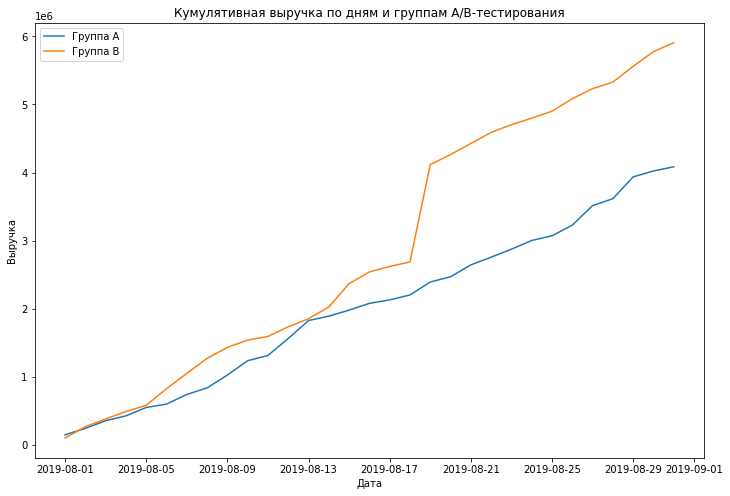

In [18]:
#зададим размеры графика 
plt.figure(figsize=(12,8))  

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_df[cumulative_df['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_df[cumulative_df['group']=='B'][['date','revenue', 'orders']]

# строим график выручки группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')

# строим график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')

# зададим описание графика
plt.legend(['Группа А', 'Группа B']) 
plt.xlabel('Дата')
plt.ylabel('Выручка') 
plt.title('Кумулятивная выручка по дням и группам A/B-тестирования')
plt.show() 


По графику видим следующее:
* группа B лидирирует на всём периоде
* у группы B произошёл резкий рост в период с 18 на 19 августа, на это могут быть 2 причины: 
    * в группу попал анамально дорогой заказ
    * в этот день было много заказов
    
Выведем графики для группы B с изменение кол-ва заказов и выручки: 

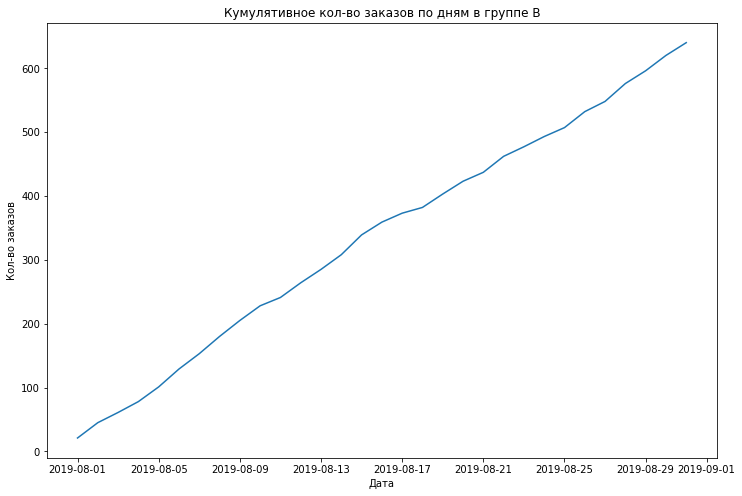

In [19]:
#зададим размеры графика 
plt.figure(figsize=(12,8)) 
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['orders'])  
# зададим описание графика
plt.xlabel('Дата')
plt.ylabel('Кол-во заказов') 
plt.title('Кумулятивное кол-во заказов по дням в группе B')
plt.show() 

График с кол-вом заказов, плавный, изучим график с выручкой:

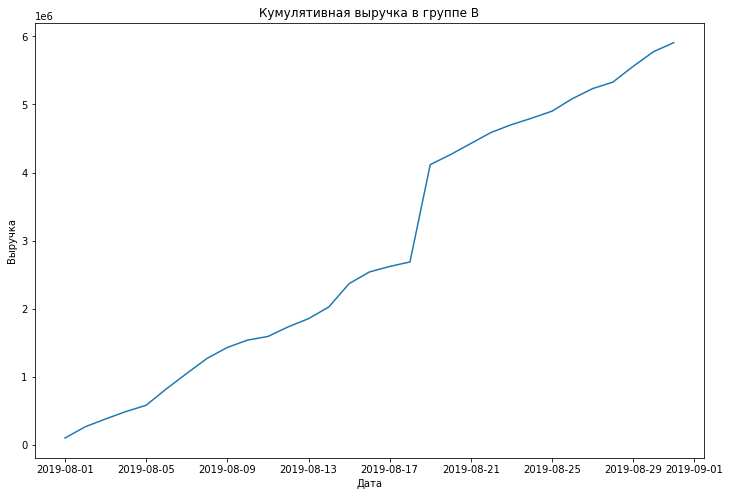

In [20]:
#зададим размеры графика 
plt.figure(figsize=(12,8)) 
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'])  
# зададим описание графика
plt.xlabel('Дата')
plt.ylabel('Выручка') 
plt.title('Кумулятивная выручка в группе B')
plt.show() 

Рост заметен на графике с выручкой, можем сделать вывод о том, что в группу попал анамально большой заказ

### Построение графика кумулятивного среднего чека по группам 
Для этого разделим кумулятивную выручку на кумулятивное число заказов: 

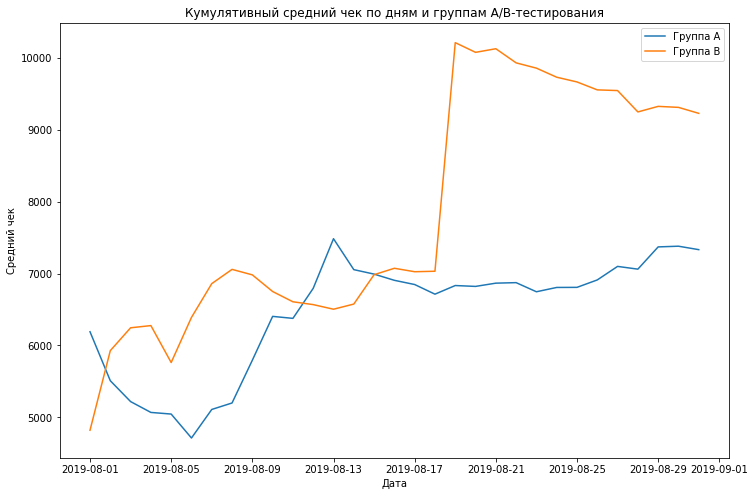

In [21]:
#зададим размеры графика  
plt.figure(figsize=(12,8))   

#построим графики, что бы получить средний чек, разделим выручку на число заказов
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')
plt.legend()  

# зададим описание графика
plt.legend(['Группа А', 'Группа B']) 
plt.xlabel('Дата')
plt.ylabel('Средний чек') 
plt.title('Кумулятивный средний чек по дням и группам A/B-тестирования')
plt.show()  

На графиках видим:
* в первой половине теста графики ведут себя не стабильно, есть как сильные росты, так и падения
* на графике среднего чека анамальное значения для группе B в период с 08.17 по 08.21 уже более явное
* к коцу периода коммулятивный средний чек группы B, выше, чем у А, но стоит учесть, что были анамальные значения
* к концу периода у группы А есть тенденция к росту, а у B к снижению

### Построение графика относительного изменения кумулятивного среднего чека группы B к группе A
Для этого соберем данные в одном датафрейме:

In [22]:
#объеденим по столбцу с датой и зададим суффиксы для каждый группы 
merged_revenue = cumulative_revenue_a.merge(
    cumulative_revenue_b, 
    left_on='date', right_on='date', 
    how='left',
    suffixes=['_a', '_b']
)
#выведем получившуюся таблицу
merged_revenue.head()

,date,revenue_a,orders_a,revenue_b,orders_b
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


Построим график:

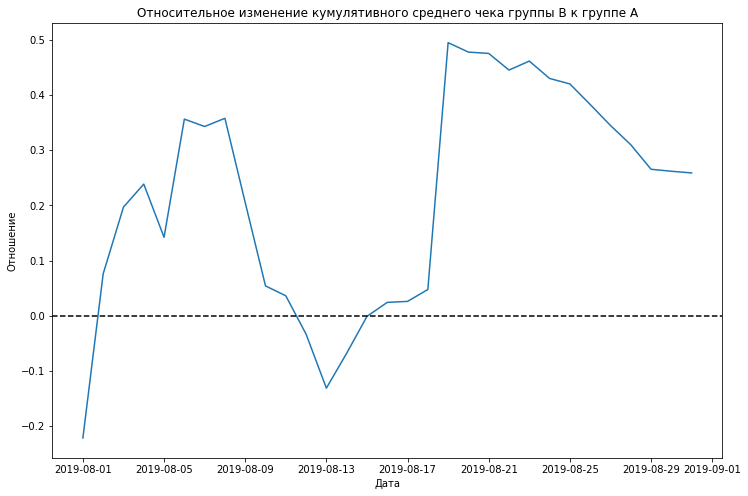

In [23]:
# зададим размеры графика  
plt.figure(figsize=(12,8))   
# cтроим отношение средних чеков
plt.plot(
    merged_revenue['date'],
    (merged_revenue['revenue_b']/
     merged_revenue['orders_b'])/
    (merged_revenue['revenue_a']/
     merged_revenue['orders_a'])
    -1
)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')  
# зададим описание графика 
plt.xlabel('Дата')
plt.ylabel('Отношение') 
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.show()   

На графике видим резкие скачки, это может значит, что именно в пиковый дни на графике, были сделаны анамально дорогие заказы.

### Построение графика кумулятивной конверсии по группам 
Аналогично проанализируем график кумулятивной конверсии 

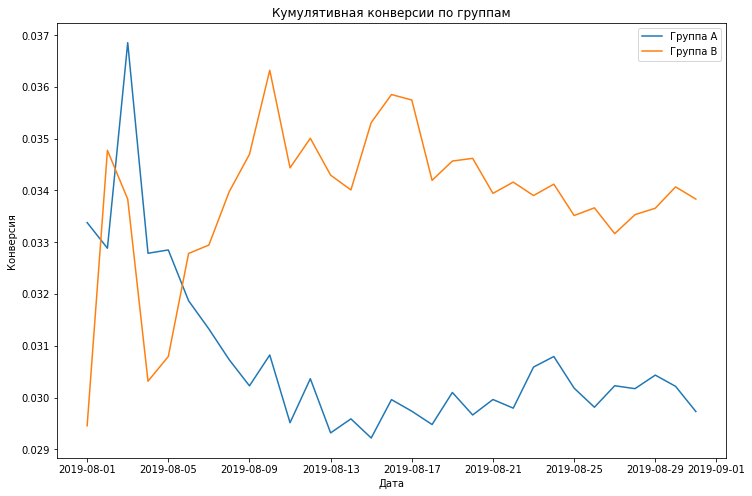

In [24]:
# считаем кумулятивную конверсию
cumulative_df['conversion'] = cumulative_df['orders']/cumulative_df['visitors']

# отделяем данные по группе A
cumulative_df_a = cumulative_df[cumulative_df['group']=='A']

# отделяем данные по группе B
cumulative_df_b = cumulative_df[cumulative_df['group']=='B']

# зададим размеры графика  
plt.figure(figsize=(12,8))   

# строим графики
plt.plot(cumulative_df_a['date'], cumulative_df_a['conversion'], label='A')
plt.plot(cumulative_df_b['date'], cumulative_df_b['conversion'], label='B')


# зададим описание графика
plt.legend(['Группа А', 'Группа B']) 
# задаем масштаб осей
plt.xlabel('Дата')
plt.ylabel('Конверсия') 
plt.title('Кумулятивная конверсии по группам')
plt.show()  

На грфике видим, что в первые дни конверся у группы А была выше, чем у В, но спустя 6 дней со времени запуска теста, это поменялось:
* для А конверсия держалась на уровне от 0.029 до 0.031,
* для B от 0.034 до 0.036

Предварительно гипотеза подтверждается, с новововведениями на сайте - конверсия растёт  

### Построение графика относительного изменения кумулятивной конверсии группы B к группе A 
Для построения графиков сначала объеденим таблицы с конверсиями:

In [25]:
#объеденим по столбцу с датой и зададим суффиксы для каждый группы  
merged_сonversion = cumulative_df_a[['date','conversion']].merge(
    cumulative_df_b[['date','conversion']], 
    left_on='date',
    right_on='date', 
    how='left',
    suffixes=['_a', '_b']
)
#выведем таблицу 
merged_сonversion.head()

,date,conversion_a,conversion_b
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793


Объединение прошло успешно, построим график:

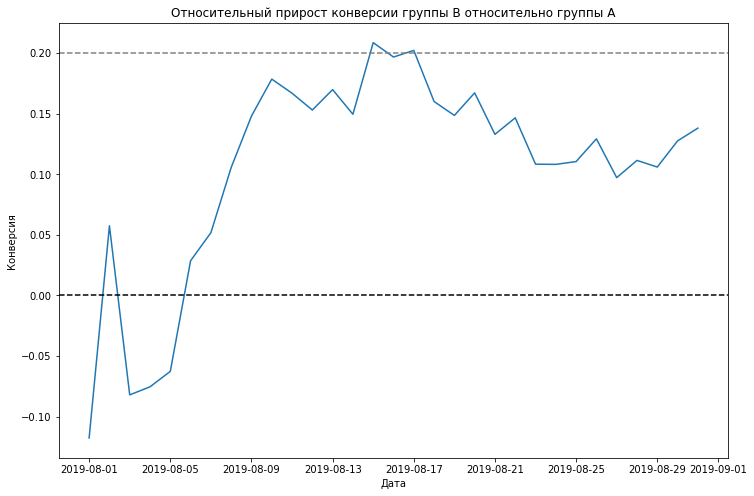

In [26]:
# зададим размеры графика  
plt.figure(figsize=(12,8))   

plt.plot(merged_сonversion['date'],
         merged_сonversion['conversion_b']/
         merged_сonversion['conversion_a']-1,
        )
# добавляем ось X c нулевым приростом и отметку в 20% 
plt.axhline(y=0, color='black', linestyle='--')  
plt.axhline(y=0.2, color='grey', linestyle='--') 
# зададим описание графика 
plt.ylabel('Конверсия') 
plt.xlabel('Дата') 
plt.title('Относительный прирост конверсии группы B относительно группы A') 
plt.show()

На графике видим, что в начале теста, конверсия показывала не стабильные результаты, сначала резко поднимаясь, а потом опускалась, но на 6й день теста, получили стабильный прирост, который привысил 20% и установился в пределах от 10 до 15 % к концу периода

### Построение точечного графика количества заказов по пользователям
Для построения графика создадим сводную таблицу с колличеством заказов по каждому пользователю:

In [27]:
#создадим сводную таблицу с кол-вом закзазов для каждого пользователя 
orders_count = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
#переименуем столбуы 
orders_count.columns = ['user_id', 'orders']
#выведем таблицу отсортиованную по убыванию кол-ва заказов 
orders_count.sort_values(by='orders', ascending=False).head(10) 

,user_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


На основе полученной таблицы построим точечную диаграмму: 

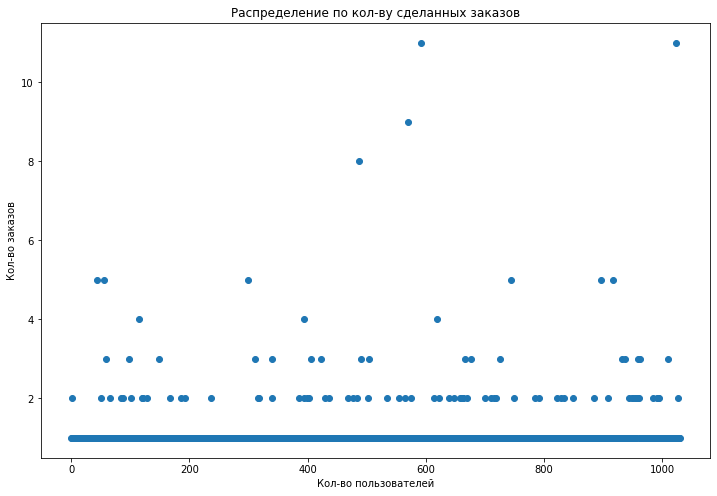

In [28]:
# серия из чисел от 0 до количества наблюдений в orders_count 
x_values = pd.Series(range(0, len(orders_count)))
# зададим размеры графика  
plt.figure(figsize=(12,8)) 
#построим график 
plt.scatter(x_values, orders_count['orders'])  
# зададим описание графика 
plt.ylabel('Кол-во заказов') 
plt.xlabel('Кол-во пользователей') 
plt.title('Распределение по кол-ву сделанных заказов') 
plt.show() 

Больше всего пользователей с 1м или 2мя заказами, остальные довольно редкие, от 3х до 5 ти заказов уже можно посчитать на взгляд по кол-ву точек на графике, но есть уникальные, которые сделали до11 заказов за период.

Наверняка, на сайте есть очень активные и постоянные пользователи - это не ошибка в данных, но для создания объективного представления такие значения будут убраны

### Подсчёт 95-й и 99-й перцентили количества заказов на пользователя. Опредления границы для аномальных пользователей 

In [29]:
print(np.percentile(orders_count['orders'], [95, 99])) 

[2. 4.]


Получаем следующий результат:
* не более 5 % совершили больше 2-ух заказов
* не более 1 % совершили больше 4-ёх заказов

Устанавливаем границу по колличеству заказов на пользователя в 3 шт., заключим её в переменную: 

In [30]:
to_much_orders = 3 

### Построение точечного графика стоимостей заказов 
Сводная таблица не требуется, остортируем по возрастанию и взгялнем на табличные значения:  

In [31]:
orders[['visitor_id', 'revenue']].sort_values(by='revenue', ascending=False).head(10) 

,visitor_id,revenue
425,1920142716,1294500
1196,2108080724,202740
858,1316129916,93940
1136,1307669133,92550
744,888512513,86620
682,4266935830,78990
662,4266935830,78990
743,4133034833,67990
1103,1164614297,66350
1099,148427295,65710


Посмотрим на распредление по неотфльтрованным данным:

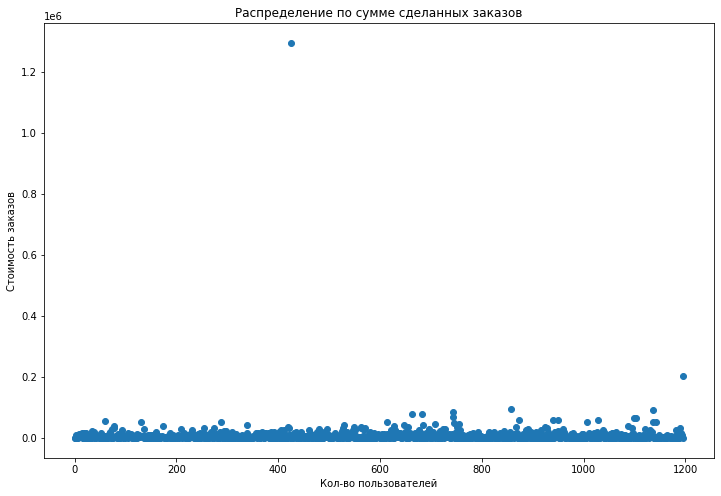

In [32]:
# серия из чисел от 0 до количества наблюдений в orders 
x_values = pd.Series(range(0, len(orders['revenue'])))
# зададим размеры графика  
plt.figure(figsize=(12,8)) 
#построим график 
scattter_plot = plt.scatter(x_values, orders['revenue'])  
# зададим описание графика 
plt.ylabel('Стоимость заказов') 
plt.xlabel('Кол-во пользователей') 
plt.title('Распределение по сумме сделанных заказов') 
plt.show() 

Можно уже заметить, что максимальное значения сильно превосходит остальные. Заказы на 200 тысяч и миллинон - очевидно будут сильно выбиваться. Зададим лимит в 100 000, что бы подробнее изучить распредление наиболее частых заказов:

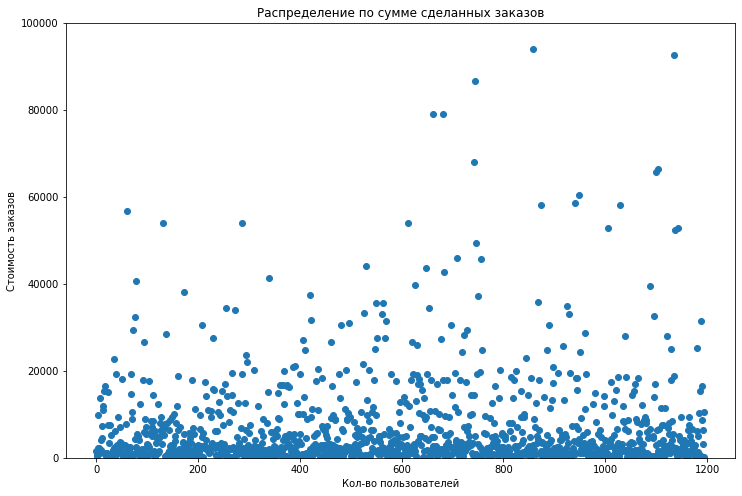

In [33]:
# серия из чисел от 0 до количества наблюдений в orders 
x_values = pd.Series(range(0, len(orders['revenue'])))
# зададим размеры графика  
plt.figure(figsize=(12,8))
#построим график 
plt.scatter(x_values, orders['revenue'])
#срежем очевидно анамальные заказы 
plt.ylim(0, 100000) 
# зададим описание графика 
plt.ylabel('Стоимость заказов') 
plt.xlabel('Кол-во пользователей') 
plt.title('Распределение по сумме сделанных заказов') 
plt.show()  

Видим, что основные значения лежат в пределах до приблизтельно 20000, по графику всё ещё сложно оценить границу анамально большого заказа, воспользуемся подсчётом процентелией

### Подсчёт 95-й и 99-й перцентили стоимости заказа. Опредления границы для аномальных заказов 

In [34]:
print(np.percentile(orders['revenue'], [95, 99]))   

[28000.  58233.2]


Получаем следующий результат:
* не более 5 % заказов стомостью более 28000 рублей 
* не более 1 % заказов стомостью более 58000 рублей  

Устанавливаем границу по сумме заказа в 30000 рублей, добавим её в переменную: 

In [35]:
to_expensive_order  = 30000

### Подсчёт статистической значимости различий в конверсии между группами по «сырым» данным 
Статистическую значимость различий будет считать с помощью теста Манна-Уитни, для начала подготовим данные:

In [36]:
# таблицы с данными по заказам на каждого пользователя
orders_by_users_a = orders[orders['group']=='A'].groupby('visitor_id')['transaction_id'].nunique().reset_index()
orders_by_users_a.columns=['visitors_id','orders']

orders_by_users_b = orders[orders['group']=='B'].groupby('visitor_id')['transaction_id'].nunique().reset_index()
orders_by_users_b.columns=['visitors_id','orders'] 

display(orders_by_users_a.head()) 
display(orders_by_users_b.head())  

,visitors_id,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


,visitors_id,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


Объявите переменные, в которых пользователям с заказами будет соответствовать число заказов пользователя, пользователям без заказов — нули. 

In [37]:
sample_a = pd.concat(
    [
        orders_by_users_a['orders'],
        pd.Series(0, 
                  index=np.arange
                  (visitors[visitors['group']=='A']['visitors'].sum() - len(orders_by_users_a['orders'])
                  ),
                  name='orders'
                 )
    ],
    axis=0)
sample_b = pd.concat(
    [
        orders_by_users_b['orders'],
        pd.Series
        (0,
         index=np.arange(
             visitors[visitors['group']=='B']['visitors'].sum() - len(orders_by_users_b['orders'])
         ),
         name='orders'
        )
    ],
    axis=0)

Данные для проведения теста Манна-Уитни готовы, сформируем нулевую и альетрнативную гипотезы:

**Нулевая гипотеза:** Различий в конверсии между группами нет

**Альтернативная гипотеза:** Различия в конверсиях между группами есть

**Коэффициент альфа:** 0.05

In [38]:
result_1 = stats.mannwhitneyu(sample_a, sample_b)[1] 
#задаим значение aplha
alpha = 0.05
#введем значение p-value
print(f'Значение p-value : {result_1}')
# условный оператор с выводом строки с ответом
if result_1 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")  
print('Средняя конверсия группы А: {:.1%}'.format(sample_a.mean()))
print('Средняя конверсия группы B: {:.1%}'.format(sample_b.mean()))  
print('Отношение конверсии В к А: {0:.3f}'.format(sample_b.mean()/sample_a.mean()-1))   

Значение p-value : 0.016792355056752608
Отвергаем нулевую гипотезу
Средняя конверсия группы А: 3.0%
Средняя конверсия группы B: 3.4%
Отношение конверсии В к А: 0.138


P-value меньше заданного значения alpha - отвергаем нулевую гипотезу, следовательно верно утвеждение о том, что различия в конверсиях есть. 

Отношений конверсий группы А к В 0.138, что можно интропритировать как относительный прирост в ~13%, что является не плохим результатом, на следующих этапах посмотрим какое значения будут иметь данные без аномалий 

### Подсчёт статистической значимости различий в среднем чеке заказа между группами по «сырым» данным 
Сформулируем гипотезы:

**Нулевая гипотеза:** Различий в средних чеках между группами нет

**Альтернативная гипотеза:** Различия в средних чеках между группами есть

**Коэффициент альфа:** 0.05


In [39]:
result_2 = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]  
#введем значение p-value
print(f'Значение p-value : {result_2}')
# условный оператор с выводом строки с ответом
if result_2 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")  
#выведем основные показатели
print('Средний чек группы А: {:.2f}'.format(orders[orders['group']=='A']['revenue'].mean()))
print('Средний чек группы B: {:.2f}'.format(orders[orders['group']=='B']['revenue'].mean())) 
print('Средний чек группы B: {:.2f}'.format(orders[orders['group']=='B']['revenue'].mean() / orders[orders['group']=='A']['revenue'].mean()))  

Значение p-value : 0.7292909855432458
Не получилось отвергнуть нулевую гипотезу
Средний чек группы А: 7333.58
Средний чек группы B: 9230.88
Средний чек группы B: 1.26


P-value значительно больше alpha, значит принимаем нулевую гипотезу - статичстичкой значимости различий в средних чеках нет, несмотря на разницу общего среднего значения по группам, которая составила в абсолютных значений 26%

### Подсчёт статистической значимости различий в конверсии между группами по «очищенным» данным 
Ранее мы изучали распредление заказов по кол-ву для пользователя и сумме, границы были опредлены следующие:
* кол-во > 3, перемиенная **to_much_orders**
* сумма > 30000, переменная **to_expensive_order**

Посмотрим, сколько в датафрейме анамальных пользователей:

In [40]:
# собираем пользователей с большим кол-вом заказов 
many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > to_much_orders]['visitors_id'],
        orders_by_users_b[orders_by_users_b['orders'] > to_much_orders]['visitors_id'],
    ],
    axis=0,
)

# собираем пользователей с слишком дорогими заказами
expensive_orders = orders[orders['revenue'] > to_expensive_order]['visitor_id']

# объединяем всё в один датафрейм 
abnormal_users = (
    pd.concat([many_orders, expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormal_users.head(5))
print(' ')
print('Кол-во анамальных пользователей: ', abnormal_users.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
dtype: int64
 
Кол-во анамальных пользователей:  57


Такое кол-во может повлиять на итоговые выводы, используем полученные данные для того, чтобы убрать аномалии:

In [41]:
#отфильтруем данные в группе А 
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitors_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='A']['visitors'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

#отфильтруем данные в группе В
sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitors_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='B']['visitors'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)  

Анамалии убрали, гипотезы для проведеня теста, по аналогии с предыдущими:

In [42]:
result_3 = stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1] 
#ведем значение pvalue
print(f'Значение p-value : {result_3}') 
# условный оператор с выводом строки с ответом
if result_3 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
print('Средняя конверсия (очищенная) группы А: {:.1%}'.format(sample_a_filtered.mean()))
print('Средняя конверсия (очищенная) группы B: {:.1%}'.format(sample_b_filtered.mean())) 
print('Отношение конверсии В к А, по очищенным данным: {0:.3f}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1))  

Значение p-value : 0.01831750089424907
Отвергаем нулевую гипотезу
Средняя конверсия (очищенная) группы А: 2.7%
Средняя конверсия (очищенная) группы B: 3.1%
Отношение конверсии В к А, по очищенным данным: 0.148


Для "очищенных" данных также справедливо утверждение о том, что конверсии разные и нулевая гипотеза верна. Само значения конверсии данных изменилось в меньшую сторону для обоих групп, лидируют по-прежнему пользователи из B, а средний прирост оказался выше на почти 2%

### Подсчёт статистической значимости различий в различий в среднем чеке заказа по «очищенным» данным 
Для "сырых" данных была принята нулевая гипотеза, проверим можем ли мы говорить о статистическом равенстве для "очищенных" данных:

In [43]:
result4 = stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'])[1] 

#посчитаем среднием значения 
mean_revenue_b = orders[np.logical_and(orders['group']=='B',
                                       np.logical_not(orders['visitor_id'].
                                                      isin(abnormal_users)))]['revenue'].mean()
mean_revenue_a = orders[np.logical_and(orders['group']=='A',
                                       np.logical_not(orders['visitor_id'].
                                                      isin(abnormal_users)))]['revenue'].mean() 

print(f'Значение p-value : {result4}')  
# условный оператор с выводом строки с ответом
if result4 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")  
#выведем всю необходимую информацию
print('Средняя чек группы А (очищенная): {:.1f}'.format(mean_revenue_b))
print('Средняя конверсиягруппы B (очищенная): {:.1f}'.format(mean_revenue_a))
print('Отношение конверсии В к А, по очищенным данным: {0:.2f}'.format(mean_revenue_b / mean_revenue_a)) 

Значение p-value : 0.9583231483662625
Не получилось отвергнуть нулевую гипотезу
Средняя чек группы А (очищенная): 5228.2
Средняя конверсиягруппы B (очищенная): 5333.3
Отношение конверсии В к А, по очищенным данным: 0.98


Для "очищенных" данных статистическая занчимость средних чеков группы B и A, также равны, но стоит заметить, что абсолютные значения практически выровнились, отношение близко к единице

## Решение

Следует продолжить тест, так как прошел недостаточный период времени для того, чтобы определить итоги теста. Необходимо провести больше наблюдений. 

## Чек-лист готовности

**Шаг 1. Приоритизация гипотез.**

**Надо:**
- [x]  Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- [x]  Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- [x]  Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

**Шаг 2. Анализ A/B-теста**

**Надо:**
- [x]  Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- [x]  Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- [x]  Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- [x]  Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
- [x]  Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
- [x]  Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- [x]  Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- [x]  Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
- [x]  Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- [x]  Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
- [x]  Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
- [x]  Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
- [x]  Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения

**Шаг 3. Решение**
- [x]  Примите решение по результатам теста и объясните его.